In [7]:
import pandas as pd
import numpy as np
import os
import re

In [3]:
os.listdir('..')

['Deep learning.ipynb',
 'Custom weights main.ipynb',
 'Custom weighting with pytorch, Poly regression-Copy1.ipynb',
 'Shallow neural net.ipynb',
 'book_train.parquet',
 'Deep neural net',
 'book_test.parquet',
 'test.csv',
 'EDA.ipynb',
 'prev_targer.csvd',
 '.ipynb_checkpoints',
 'prev_targer.csv',
 'trade_train.parquet',
 'LeadingLagResearch',
 'Lightgbm',
 'trade_test.parquet',
 'sample_submission.csv',
 'Naive solution - prev target.ipynb',
 'Custom Convolve debug.ipynb',
 'train.csv',
 'utils.py',
 'Custom weighting with pytorch, Poly regression.ipynb',
 'optiver-realized-volatility-prediction.zip',
 'Custom weighting with pytorch.ipynb',
 '__pycache__']

In [11]:
stock_ids = sorted([int(re.sub('stock_id=', '', x)) for x in os.listdir('../book_train.parquet')])

In [12]:
train = pd.read_csv('../train.csv')

<AxesSubplot:>

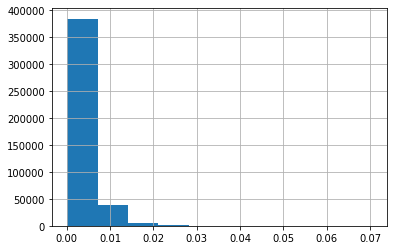

In [15]:
train['target'].hist()

In [57]:
book1 = pd.read_parquet('../book_train.parquet/stock_id=' + str(0))
book2 = pd.read_parquet('../book_train.parquet/stock_id=' + str(2))

In [58]:
book2.mean()

time_id              16056.001400
seconds_in_bucket      298.330206
bid_price1               0.999883
ask_price1               1.000146
bid_price2               0.999767
ask_price2               1.000259
bid_size1              195.515098
ask_size1              200.389852
bid_size2              218.284247
ask_size2              224.609197
dtype: float64

In [59]:
def add_wap_log(book):
    book['wap'] = (book['ask_size1'] * book['bid_price1'] + book['bid_size1'] * book['ask_price1']) / (
        book['ask_size1'] + book['bid_size1'])
    
    book['log'] = np.log(book['wap'])

In [60]:
add_wap_log(book1)
add_wap_log(book2)

In [61]:
book1['ret'] = book1.groupby('time_id')['log'].diff()
book2['ret'] = book2.groupby('time_id')['log'].diff()

In [62]:
book1 = book1[~book1['ret'].isnull()]
book2 = book2[~book2['ret'].isnull()]

<AxesSubplot:>

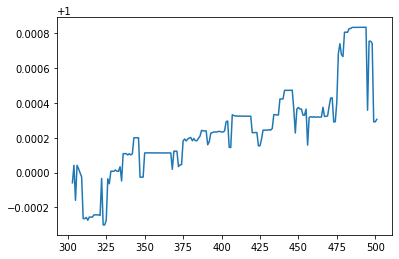

In [63]:
book1[book1.time_id == 11]['wap'].plot()

In [52]:
book2['time_id'].unique()

array([    5,    11,    16, ..., 32758, 32763, 32767], dtype=int16)

<AxesSubplot:>

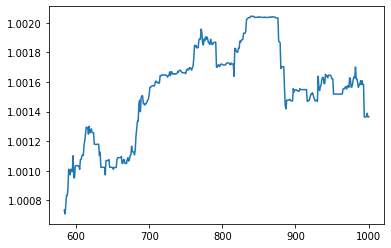

In [65]:
book2[book2.time_id == 11]['wap'].plot()

In [67]:
train.groupby('stock_id')['target'].mean().plot()

stock_id
0      0.004028
1      0.004362
2      0.002385
3      0.006182
4      0.004197
         ...   
122    0.003762
123    0.002506
124    0.003691
125    0.002016
126    0.005321
Name: target, Length: 112, dtype: float64